In [124]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [125]:
data=pd.read_csv('mushrooms.csv')

In [126]:
data.head()

,type,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [127]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
type                        8124 non-null object
cap_shape                   8124 non-null object
cap_surface                 8124 non-null object
cap_color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill_attachment             8124 non-null object
gill_spacing                8124 non-null object
gill_size                   8124 non-null object
gill_color                  8124 non-null object
stalk_shape                 8124 non-null object
stalk_root                  8124 non-null object
stalk_surface_above_ring    8124 non-null object
stalk_surface_below_ring    8124 non-null object
stalk_color_above_ring      8124 non-null object
stalk_color_below_ring      8124 non-null object
veil_type                   8124 non-null object
veil_color                  8124 non-null object
ring_number

In [128]:
data.isnull().sum()

type                        0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
dtype: int64

In [129]:
data.describe()

,type,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


Data Visualization

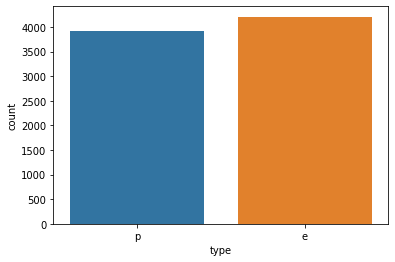

In [130]:
sns.countplot(x='type',data=data)

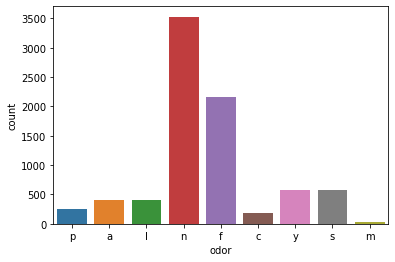

In [131]:
sns.countplot(x='odor',data=data)

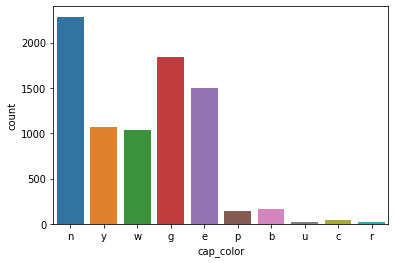

In [132]:
sns.countplot(x='cap_color',data=data)

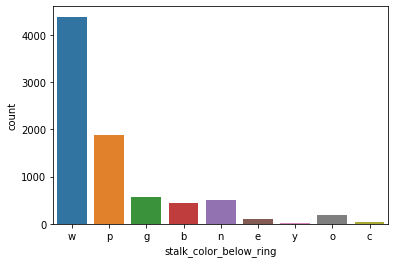

In [133]:
sns.countplot(x='stalk_color_below_ring',data=data)

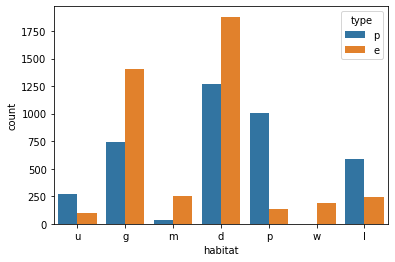

In [134]:
sns.countplot(x='habitat',hue='type',data=data)

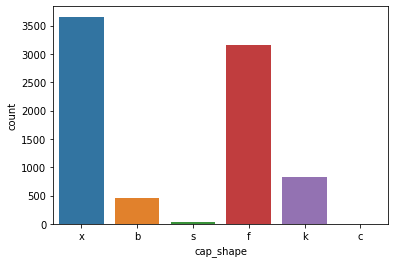

In [135]:
sns.countplot(x='cap_shape',data=data)

Manipulating Data

In [136]:
data['type'] = [1 if i == 'p' else 0 for i in data['type']]

In [137]:
data.drop('veil_type',axis=1,inplace=True)

In [138]:
for column in data.drop(["type"],axis=1).columns:
    value= 0
    step= 1/(len(data[column].unique())-1)
    for i in data[column].unique():
        data[column] = [value if letter == i else letter for letter in data[column]]
        value += step

In [139]:
data.head(2)

,type,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,1,0.0,0.0,0.000000,0.0,0.000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000000
1,0,0.0,0.0,0.111111,0.0,0.125,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125,0.2,0.166667


Preparing Data for ML

In [140]:
from sklearn.model_selection import train_test_split
y = data["type"].values     
x = data.drop(["type"], axis=1).values   
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42,test_size=0.3)    

Classification Method

In [141]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver="lbfgs")
lr.fit(x_train,y_train)
print("Test Accuracy: {}%".format(round(lr.score(x_test,y_test)*100,2)))

Test Accuracy: 97.13%


KNN

In [142]:
from sklearn.neighbors import KNeighborsClassifier
best_Kvalue = 0
best_score = 0
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    if knn.score(x_test,y_test) > best_score:
        best_score = knn.score(x_train,y_train)
        best_Kvalue = i
print("""Best KNN Value: {}
Test Accuracy: {}%""".format(best_Kvalue, round(best_score*100,2)))

Best KNN Value: 1
Test Accuracy: 100.0%


SVM

In [143]:
from sklearn.svm import SVC
svm = SVC(random_state=42, gamma="auto")
svm.fit(x_train,y_train)
print("Test Accuracy: {}%".format(round(svm.score(x_test,y_test)*100,2)))

Test Accuracy: 97.54%


Naive Bayes 

In [144]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)
print("Test Accuracy: {}%".format(round(nb.score(x_test,y_test)*100,2)))

Test Accuracy: 92.0%


Decision Tree 

In [145]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
print("Test Accuracy: {}%".format(round(dt.score(x_test,y_test)*100,2)))

Test Accuracy: 100.0%


Random Forest 

In [146]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train,y_train)
print("Test Accuracy: {}%".format(round(rf.score(x_test,y_test)*100,2)))

Test Accuracy: 100.0%


Confusion Matrix

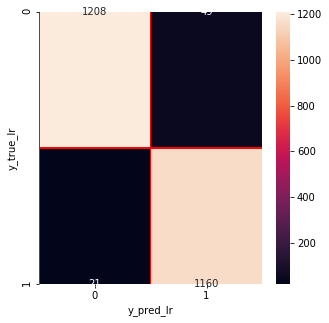

In [147]:
from sklearn.metrics import confusion_matrix
y_pred_lr = lr.predict(x_test)
y_true_lr = y_test
cm = confusion_matrix(y_true_lr, y_pred_lr)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred_lr")
plt.ylabel("y_true_lr")
plt.show()

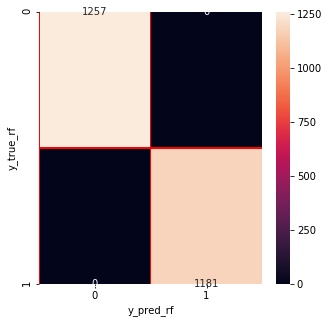

In [148]:
y_pred_rf = rf.predict(x_test)
y_true_rf = y_test
cm = confusion_matrix(y_true_rf, y_pred_rf)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred_rf")
plt.ylabel("y_true_rf")
plt.show()

In [149]:
from sklearn.externals import joblib
joblib.dump(rf,'mushrooms_dataset.pkl')

['mushrooms_dataset.pkl']